In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from helper import load_image_from_url, render_results_in_image

In [3]:
from transformers import pipeline

In [4]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [13]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50", device=0)

In [64]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.pt')  # load an official model

100%|██████████| 21.5M/21.5M [00:01<00:00, 18.1MB/s]


In [6]:
from PIL import Image

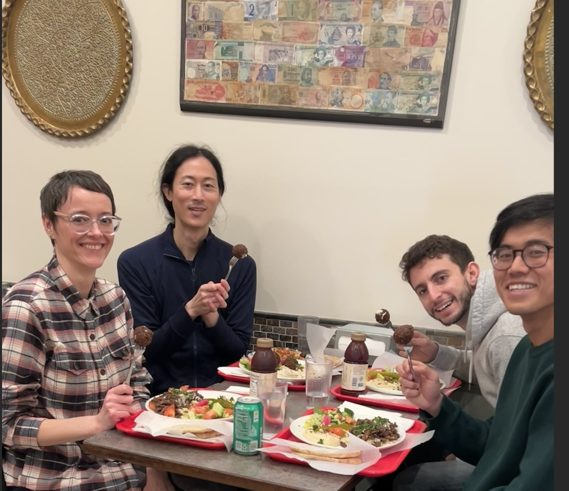

In [7]:
raw_image = Image.open('huggingface_friends.png')
raw_image.resize((569, 491))

In [19]:
pipeline_output = od_pipe(raw_image)

In [20]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

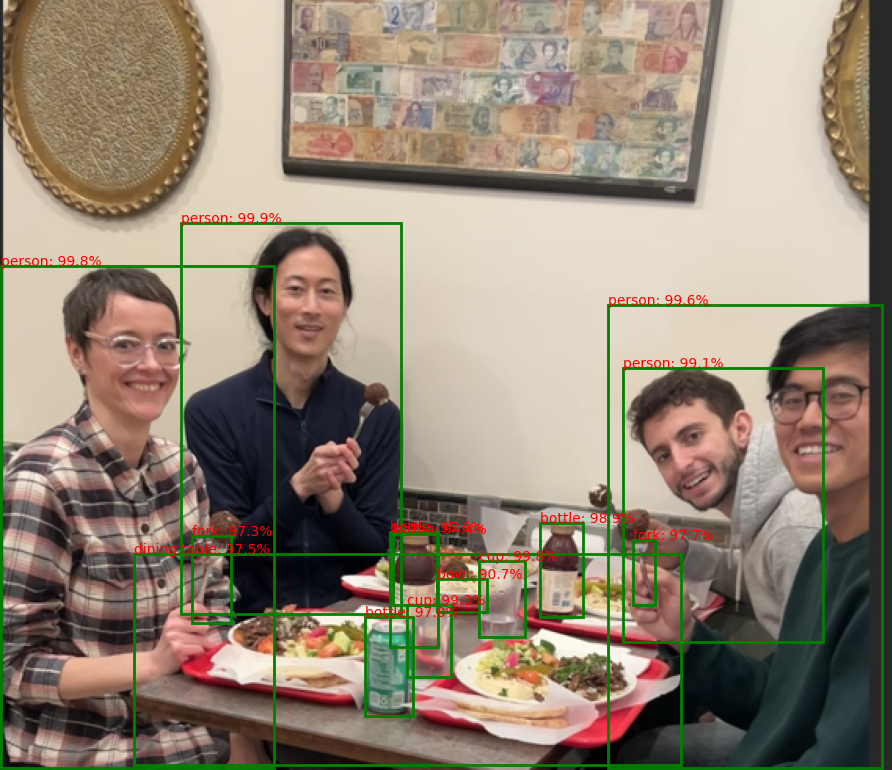

In [10]:
processed_image

In [49]:
import matplotlib.pyplot as plt

In [66]:
results = model(['huggingface_friends.png', 'dayatthebeach.jpg'])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='result.jpg')  # save to disk



0: 640x640 4 persons, 3 bottles, 1 wine glass, 2 cups, 3 pizzas, 1 dining table, 1: 640x640 5 persons, 1 umbrella, 1 handbag, 331.5ms
Speed: 7.8ms preprocess, 165.7ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
import os
import gradio as gr

In [12]:
def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [ ]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [ ]:
demo.launch(share=True, server_port=int(os.environ['PORT1']))

In [ ]:
demo.close()

In [ ]:
from helper import summarize_predictions_natural_language

In [ ]:
text = summarize_predictions_natural_language(pipeline_output)

In [ ]:
text

In [ ]:
tts_pipeline = pipeline("text-to-speech", model="ylacombe/bark-small", device=0)

In [ ]:
narrated_text = tts_pipeline(text)

In [ ]:
from IPython.display import Audio as IPythonAudio

In [ ]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])